# Polynomial Regression

We can use non-linear functions of features to get a better fit of data. For example:
$$f_{\vec{w},b}(x) = w_1x + w_2x^2 + w_3x^3 +b$$
$$f_{\vec{w},b}(x) = w_1x + w_2 \sqrt{x} +b$$

Here feature scaling is also very important as if the $x$ goes up to $10^3$ in first example then $x^2$ and $x^3$ goes up to $10^6$, $10^9$. Hence we may use normalization or standardization (z-score normalization) techniques.


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Following are functions we previously coded:

In [2]:
def cost_multireg(X,y,w,b):
    """
    Predicting valus for multiple regression:
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b : scalar, parameter
    
    Output:
    cost : (scalar), Cost of predicted values
    """
    
    n = X.shape[0]
    cost = 0
    for i in range(n):
        f_wb_i = np.dot(X[i],w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/ (2*n)
    
    return cost

In [3]:
def pdv(X,y,w,b):
    """
    Computes the partial derivatives for gradient descent with multiple variables
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b : scalar, parameter
    
    Output:
    dj_dw : (ndarray(d,)), Gradient of cost function w.r.t w
    dj-db : (scalar), Partial derivative of cost function w.r.t b
    """
    
    n,d = X.shape
    dj_dw = np.zeros(d,)
    dj_db = 0
    
    for i in range(n):
        for j in range(d):
            dj_dw[j] = dj_dw[j] + (np.dot(X[i],w) + b - y[i])*X[i,j]
        dj_db = dj_db + (np.dot(X[i],w) + b - y[i])
    
    dj_dw = dj_dw/n
    dj_db = dj_db/n
    
    return dj_dw,dj_db

In [4]:
def grad_desc(X, y, w_in, b_in, alpha, num):
    """
    Computes gradient descent for multiple regression
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w_in : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b_in : scalar, parameter
    alpha : learning rate
    num : (int), number of iterations
    
    Outputs: 
    w : final value of parameter after gradient descent
    b : final value of parameter after gradient descent
    J_hist : (list), cost values list
    """
    
    J_hist = []
    w = w_in
    b = b_in
    
    for i in range(num):
        dj_dw,dj_db = pdv(X,y,w,b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    
        if i<10000:
            J_hist.append(cost_multireg(X,y,w,b))
    
    return w,b,J_hist

## Normalization:

- **Mean normalization:** 
For every $j$th observation of $i$th feature we apply: $$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_i}{max(x^{(i)})-min(x^{(i)})}$$

- **Z-score normalization:**
For every $j$th observation of $i$th feature we apply: $$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_i}{\sigma_i}$$

where 
$$
\begin{align}
\mu_i &= \frac{1}{n} \sum_{j=0}^{n-1} x^{(i)}_j\\
\sigma^2_i &= \frac{1}{n} \sum_{j=0}^{n-1} (x^{(i)}_j - \mu_j)^2
\end{align}
$$ and $n$ is the number of observations.


In [5]:
def zscore_norma(X):
    """
    Computes the z-score normalization for a data matrix
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    
    Outputs: 
    normaliz_X  : (ndarray (n,d)), Normzalised data matrix (column-wise)
    mean : (ndarray(d,)), Mean of each feature column
    stan_div : (ndarray(d,)), Standard deviaiton of each feature column
    """
    
    mean = np.mean(X,axis=0)
    stan_div = np.std(X,axis=0)
    
    normaliz_X = (X- mean)/stan_div
    
    return normaliz_X, mean, stan_div

We use examples to see how this works:

In [6]:
x_1 = np.arange(0,25,1)
y_1 = 1 +x_1**2
X_1 = x_1.reshape(-1,1)

In [7]:
w_1,b_1,Jhist_1 = grad_desc(X_1,y_1,w_in=0,b_in=0, alpha= 0.01, num= 1000)

In [8]:
w_1,b_1

(array([23.59962371]), array([-84.46933928]))

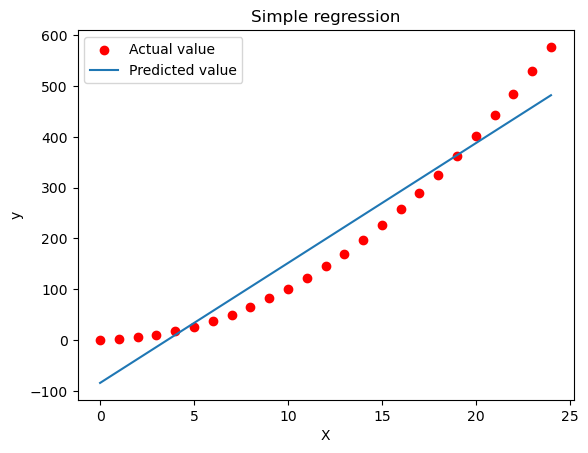

In [9]:
plt.title("Simple regression")
plt.scatter(x_1,y_1,c='r',label='Actual value')
plt.plot(x_1, X_1 @ w_1 + b_1, label="Predicted value")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

Now we will use non-linear features and then observe the output:

In [13]:
x_2 = np.arange(0, 25, 1)
y_2 = x_2**2
X_2 = np.c_[x_2, x_2**2, x_2**3]


X_2, mean_X_2, sd_X_2 = zscore_norma(X_2)
w_in_2 = np.zeros(3)
b_in_2=0

In [15]:
w_2,b_2,Jhist_2 = grad_desc(X_2,y_2,w_in_2,b_in_2, alpha= 0.01, num= 1000)

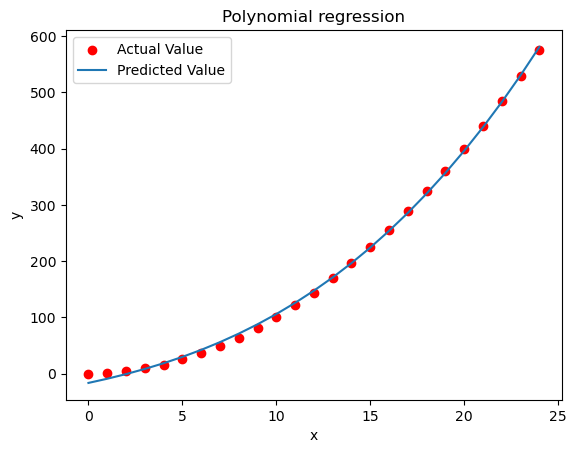

In [16]:
plt.title("Polynomial regression")
plt.scatter(x_2, y_2,c='r',label="Actual Value")
plt.plot(x_2,X_2@w_2 + b_2, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [18]:
w_2,b_2

(array([50.95363425, 64.10486104, 66.58236588]), 195.9915384355075)

Clearly using non-linear functions of the feature variables as new feature variables and then applying multiple regression gives better estimate. This is polynomial regression.